In [2]:
import sqlalchemy
from sqlalchemy import create_engine, inspect, text
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres"
SQL_IP = "localhost"
PORT = "5432"
DATABASE = "Crowdfunding_ETL"

In [4]:
# create engine
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string) 

In [5]:
# explore and understand the data

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

category
category_id VARCHAR(100)
category VARCHAR(100)
last_updated TIMESTAMP

subcategory
subcategory_id VARCHAR(100)
subcategory VARCHAR(100)
last_updated TIMESTAMP

contacts
contact_id INTEGER
first_name VARCHAR(100)
last_name VARCHAR(100)
email VARCHAR(100)
last_updated TIMESTAMP

campaign
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(100)
description VARCHAR(100)
goal DOUBLE_PRECISION
pledged DOUBLE_PRECISION
outcome VARCHAR(100)
backers_count INTEGER
country VARCHAR(100)
currency VARCHAR(100)
launch_date DATE
end_date DATE
category_id VARCHAR(100)
subcategory_id VARCHAR(100)
last_updated TIMESTAMP



In [6]:
# LOAD DATA
filepath = "../Resources/category.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("category", schema="public", con=engine, if_exists="append", method="multi", index=False)

(9, 2)


9

In [7]:
# LOAD  DATA
filepath = "../Resources/subcategory.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("subcategory", schema="public", con=engine, if_exists="append", method="multi", index=False)

(24, 2)


24

In [8]:
# LOAD  DATA
filepath = "../Resources/contacts.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("contacts", schema="public", con=engine, if_exists="append", method="multi", index=False)

(1000, 4)


1000

In [9]:
# LOAD  DATA
filepath = "../Resources/campaign.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("campaign", schema="public", con=engine, if_exists="append", method="multi", index=False)

(1000, 14)


1000

In [28]:
# QUERY List the frequency counts in descending order of categories with successful outcome.
query = """
        select category.category_id, category, count(outcome) 
        from category
        join campaign
        on category.category_id=campaign.category_id
        where outcome='successful'
        group by category.category_id, outcome
        order by count(outcome)desc;
        """

df = pd.read_sql(text(query), con=engine)
df.head(10)

,category_id,category,count
0,cat4,theater,187
1,cat5,film & video,102
2,cat2,music,99
3,cat3,technology,64
4,cat6,publishing,40
5,cat8,photography,26
6,cat1,food,22
7,cat7,games,21
8,cat9,journalism,4


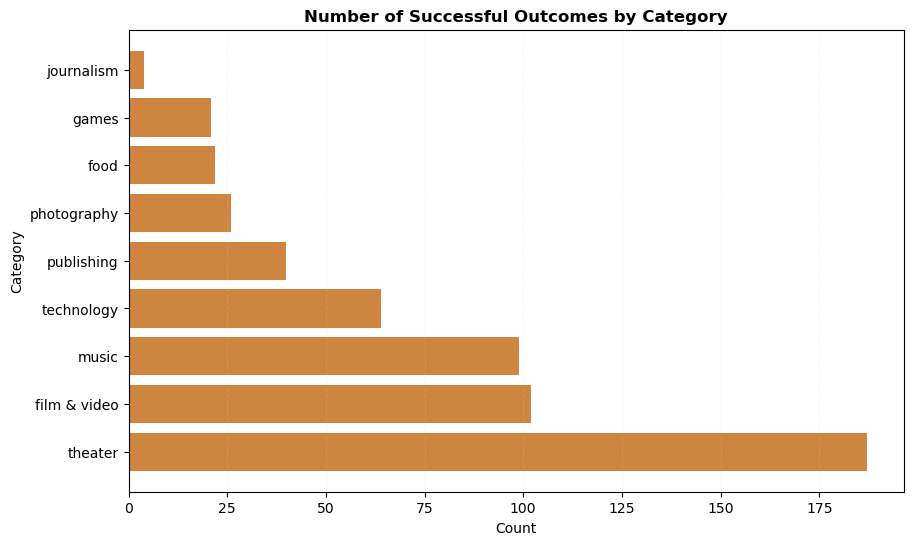

In [65]:
# QUERY VISUALIZATION
plt.figure(figsize=(10,6))
plt.barh(df.category, df["count"], color="peru")
plt.title("Number of Successful Outcomes by Category", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Category")
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.2)

plt.show()